In [2]:
import numpy as np 
import scipy as sp 
import numpy.linalg as la

In [20]:
from evals_utils import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt


In [5]:
print plt.style.available
plt.style.use('seaborn')

[u'seaborn-darkgrid', u'Solarize_Light2', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'fast', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


In [33]:
prices_rs = np.loadtxt('rr_planting_test/m_0/prices_0.5_20._200_gd1')
prices_rsb = np.loadtxt('rr_planting_test/m_0/prices_-0.5_20._200_gd1')
rar_rsb = np.loadtxt('rr_planting_test/m_0/rar_-0.5_20._200_gd1')
rar_rs = np.loadtxt('rr_planting_test/m_0/rar_0.5_20._200_gd1')
# prices_rs = np.loadtxt('rr_planting_test/m_0.57/prices_1._20._200_gd1')
# prices_rsb = np.loadtxt('rr_planting_test/m_0.57/prices_-1._20._200_gd1')
# rar_rsb = np.loadtxt('rr_planting_test/m_0.57/rar_-1._20._200_gd1')
# rar_rs = np.loadtxt('rr_planting_test/m_0.57/rar_1._20._200_gd1')

In [34]:
print prices_rs.shape, prices_rsb.shape, rar_rs.shape

(402, 200) (62, 200) (401, 4)


In [35]:
rar_rs[-1]

array([4.0000e+02, 1.7980e+03, 4.4950e-01, 3.1498e+00])

# Computing two types of overlaps


## RS Phase

In [36]:
p_initial = prices_rs[1]

In [37]:
overlaps_1_rs = []
for i in range(1,prices_rs.shape[0]):
    overlaps_1_rs.append(p_initial.dot(prices_rs[i])/200)

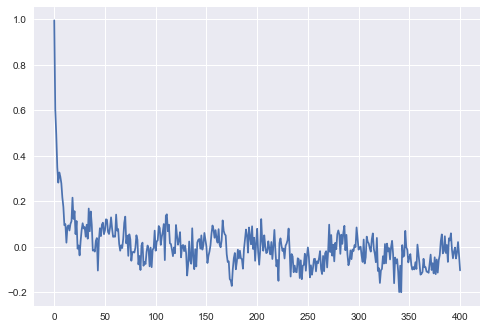

In [38]:
plt.plot(overlaps_1_rs)

In [39]:
N = 200

In [40]:
overlaps_2_rs = []
for i in range(1,prices_rs.shape[0]):
    q2 = prices_rs[i-1].dot(prices_rs[i])/N
#     print q2
    overlaps_2_rs.append(q2)
    

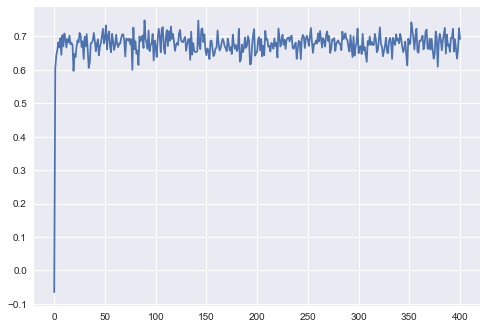

In [41]:
plt.plot(overlaps_2_rs)

## RSB Phase

In [42]:
p_initial = prices_rsb[1]

In [43]:
overlaps_1_rsb = []
for i in range(1,prices_rsb.shape[0]):
    overlaps_1_rsb.append(p_initial.dot(prices_rsb[i])/200)

In [44]:
len(overlaps_1_rsb)

61

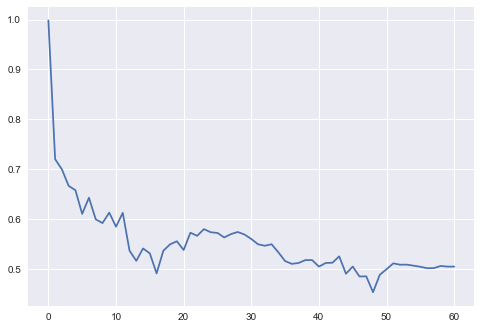

In [45]:
plt.plot(overlaps_1_rsb[:])

In [46]:
overlaps_2_rsb = []
for i in range(1,prices_rsb.shape[0]):
    q2 = prices_rsb[i-1].dot(prices_rsb[i])/N
#     print q2
    overlaps_2_rsb.append(q2)

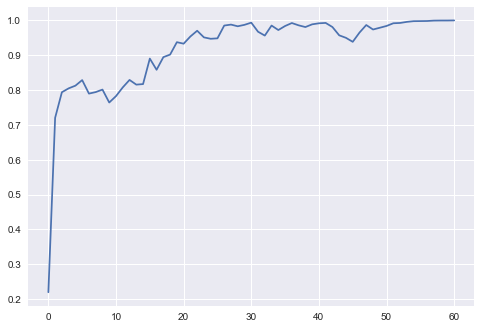

In [47]:
plt.plot(overlaps_2_rsb)

## Putting it all together

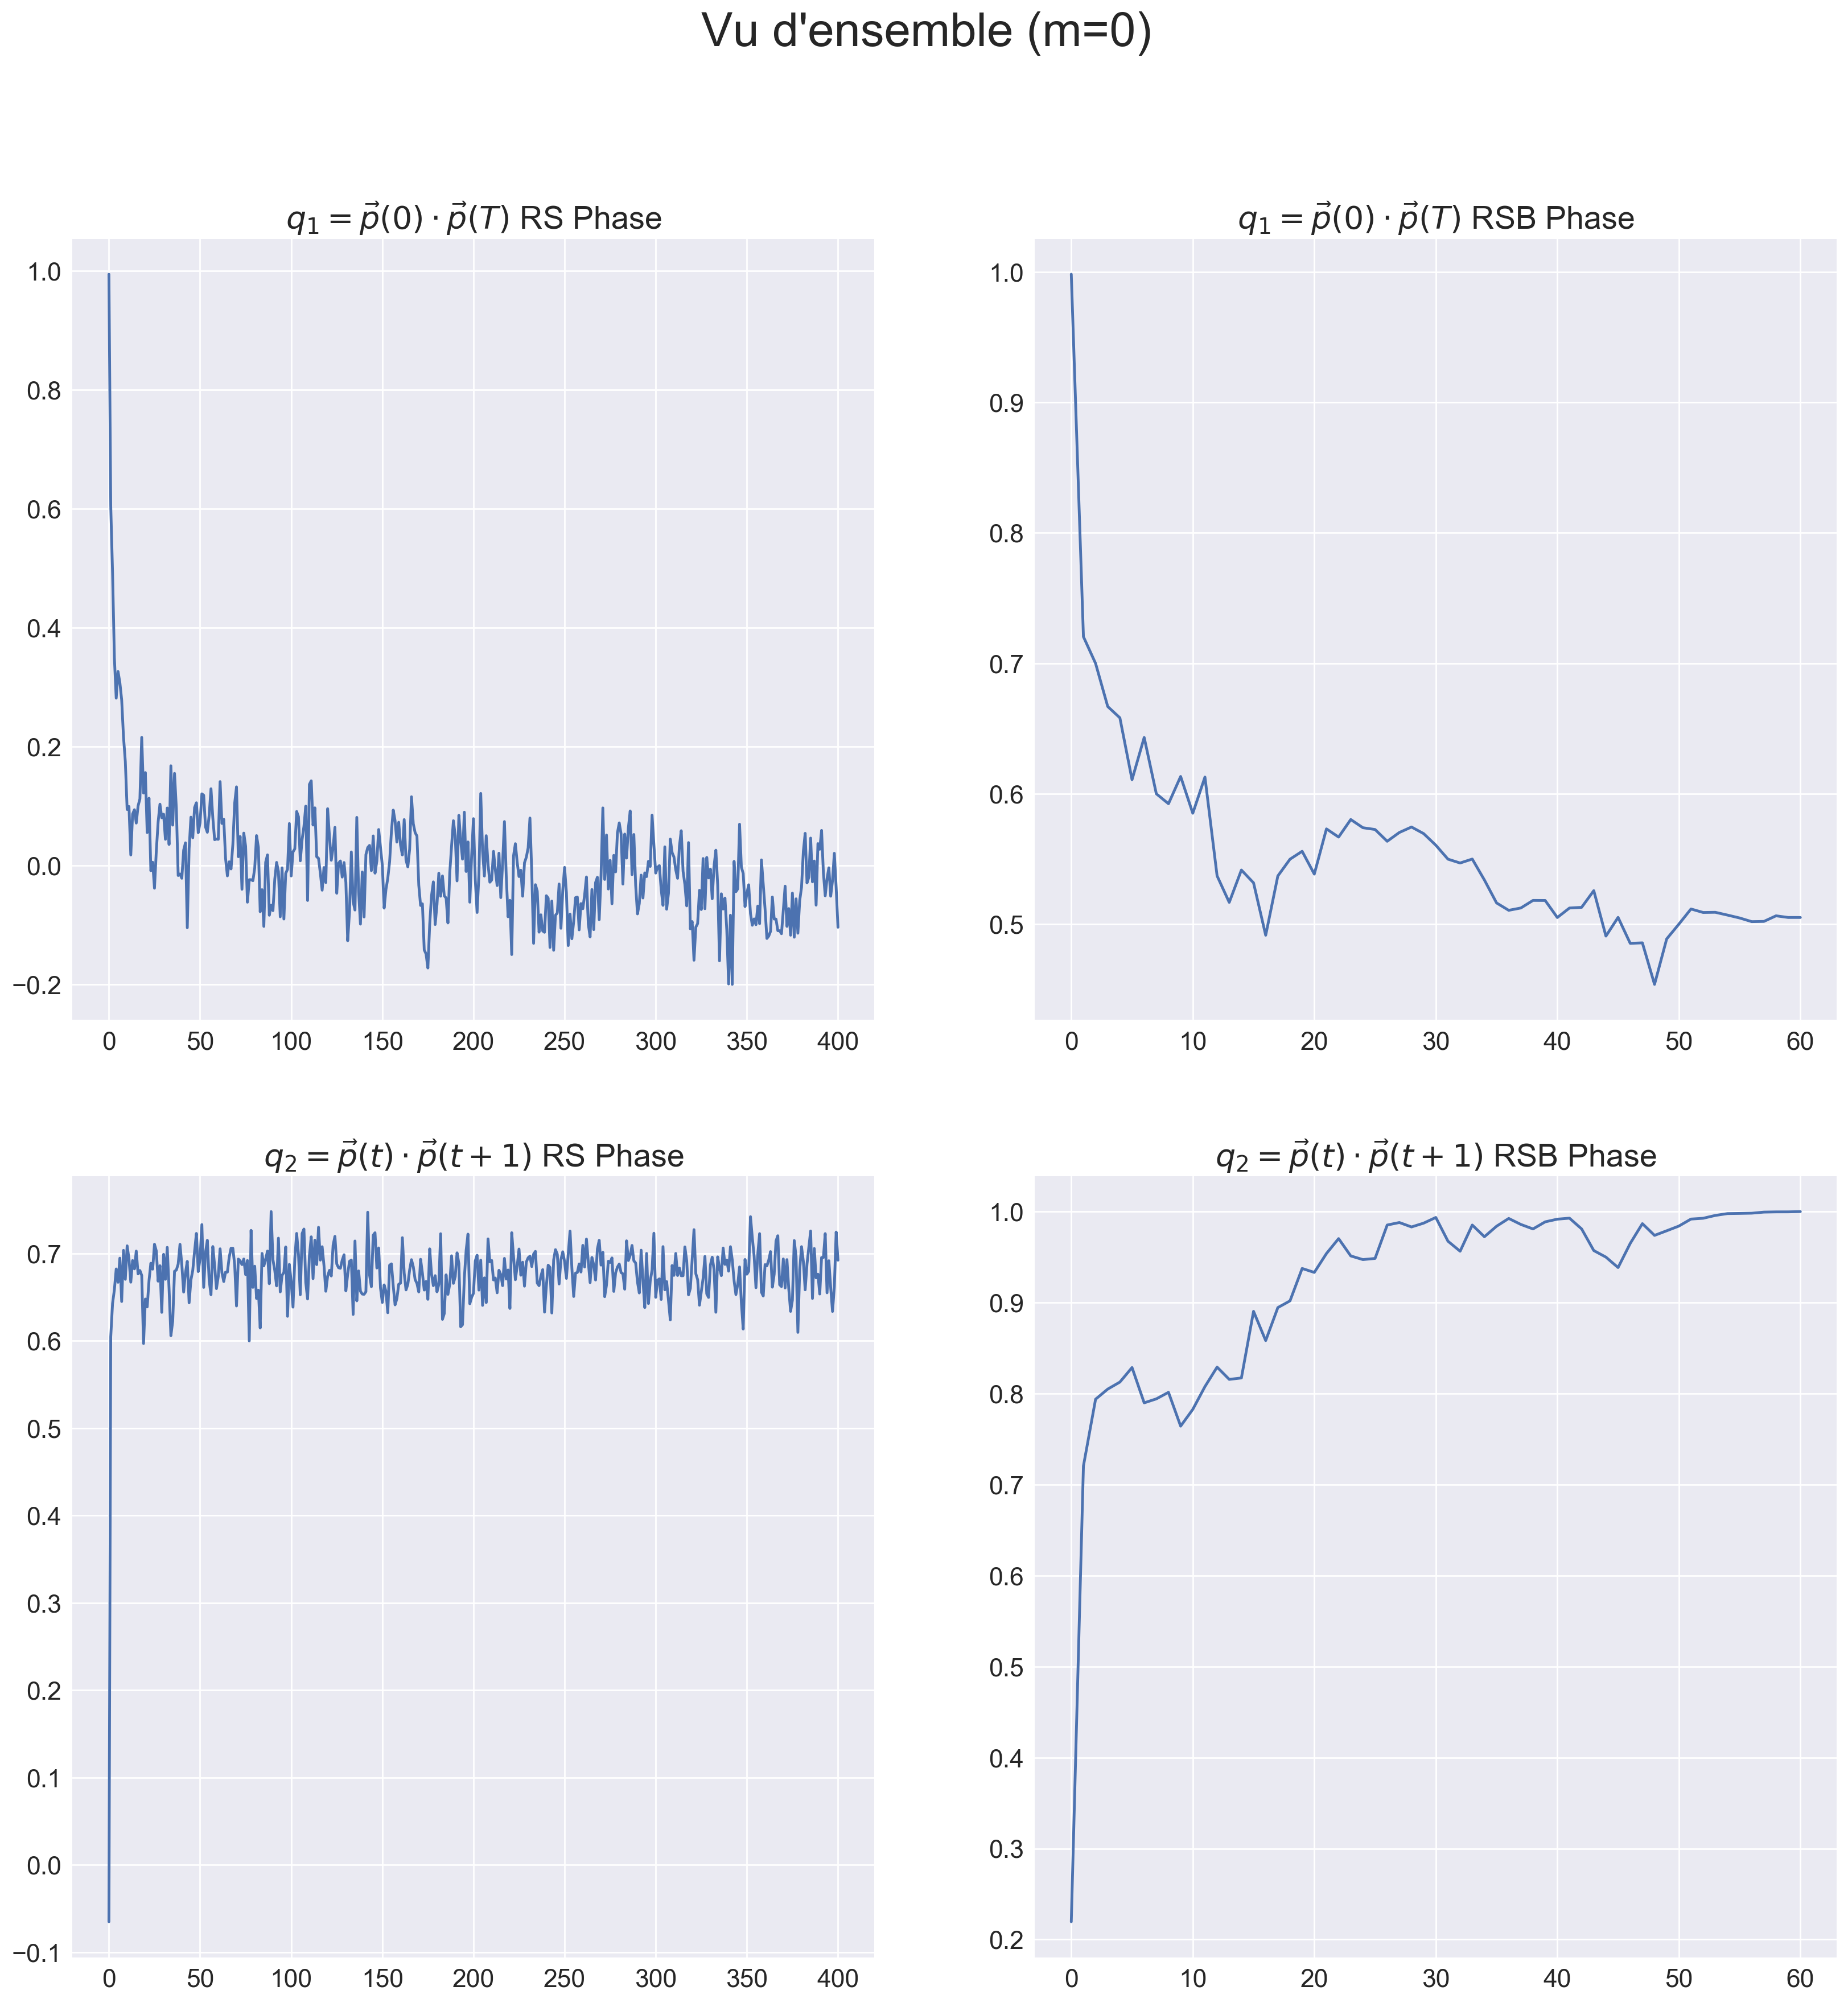

In [298]:
fig = plt.figure(figsize = (20,20), dpi = 200)
plt.subplot(221)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.plot(overlaps_1_rs)
plt.title('$q_{1} = \\vec{p}(0) \\cdot \\vec{p}(T)$ RS Phase', fontsize = 20)
plt.subplot(222)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title('$q_{1} = \\vec{p}(0) \\cdot \\vec{p}(T)$ RSB Phase', fontsize = 20)
plt.plot(overlaps_1_rsb)
plt.subplot(223)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title('$q_{2} = \\vec{p}(t) \\cdot \\vec{p}(t+1)$ RS Phase', fontsize = 20)
plt.plot(overlaps_2_rs)
plt.subplot(224)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title('$q_{2} = \\vec{p}(t) \\cdot \\vec{p}(t+1)$ RSB Phase', fontsize = 20)
plt.plot(overlaps_2_rsb)
plt.suptitle("Vu d'ensemble (m=0)", fontsize = 30)
plt.savefig('plots/overlaps_ensemble_m0.png')
plt.savefig('plots/overlaps_ensemble_m0.pdf')

## Putting it all together (bis)

Lets make the following set of graphs: $q_{1}$, $q_{2}$ in the first row and then in the next row, we add the graphs for energy and fraction of unsatisfied constraints. Prevents us from having cluttered graphs. 

We will do it for both the $m=0$ and $m=0.57$ case. 

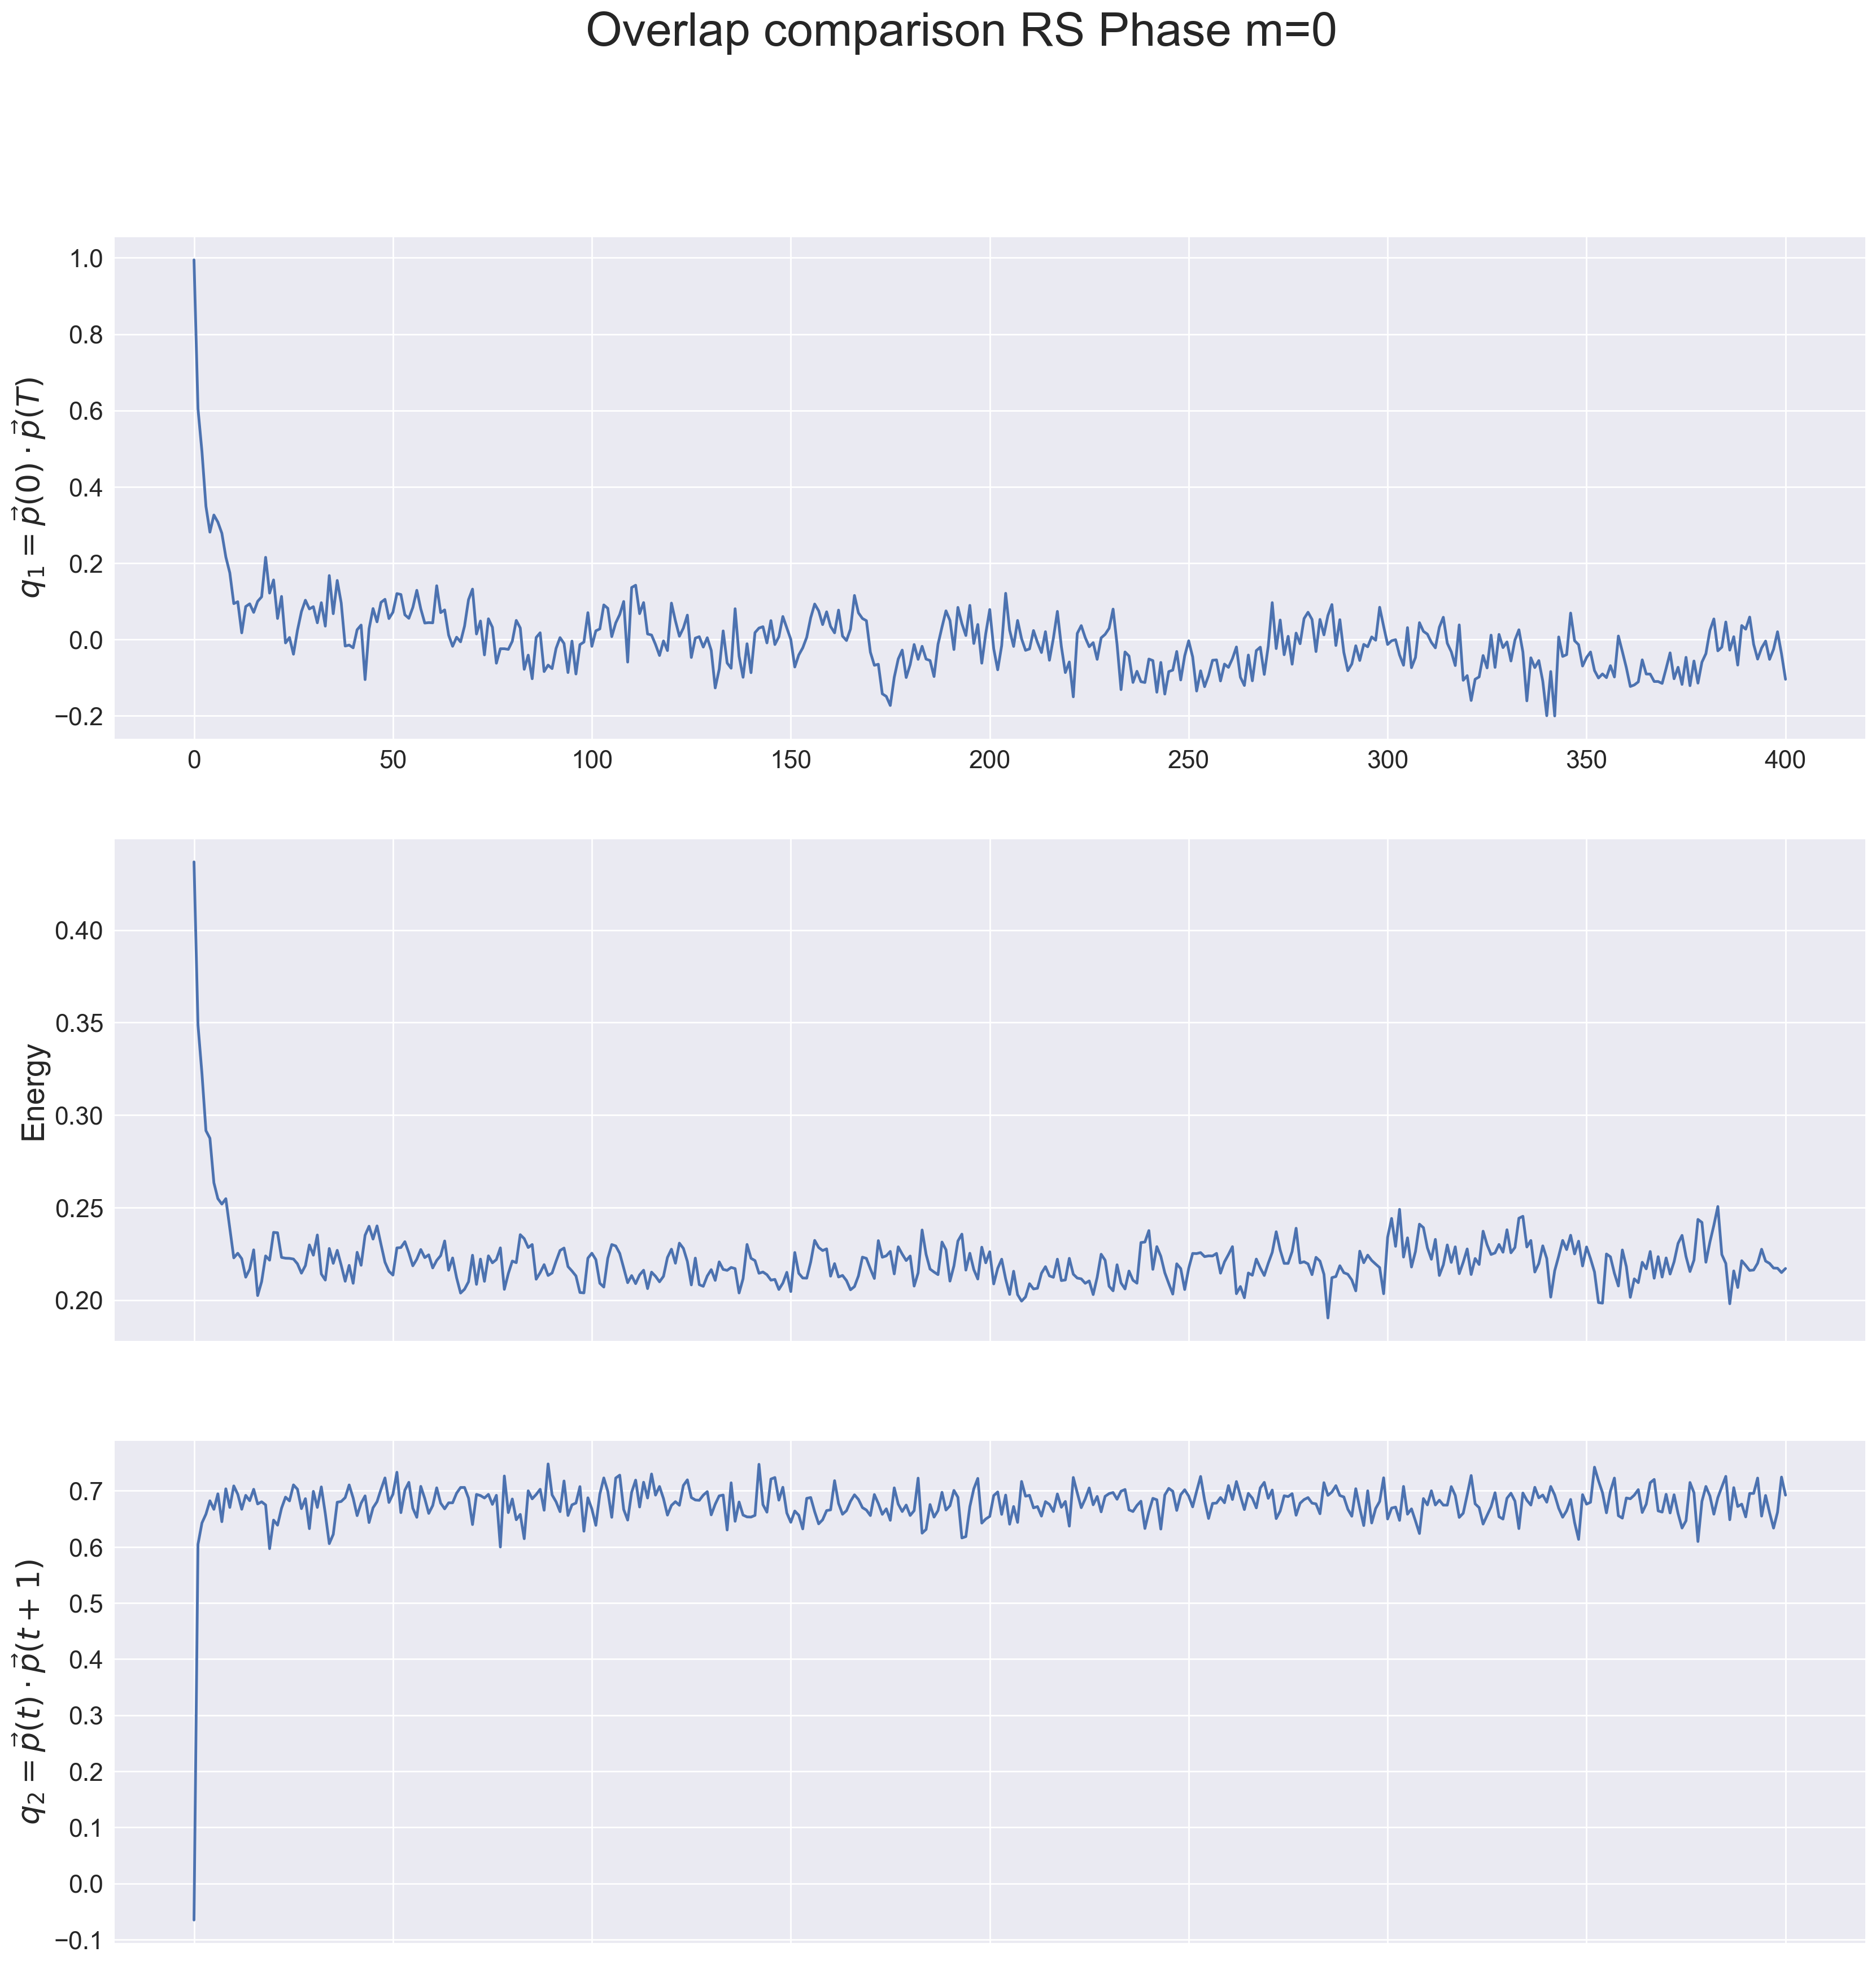

In [53]:
fig = plt.figure(figsize = (20,20), dpi = 200)
ax1 = plt.subplot(311)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.plot(overlaps_1_rs)
# plt.title('$q_{1} = \\vec{p}(0) \\cdot \\vec{p}(T)$', fontsize = 20)
plt.ylabel('$q_{1} = \\vec{p}(0) \\cdot \\vec{p}(T)$', fontsize = 20)


ax2 = plt.subplot(312,sharex=ax1)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
# plt.title('Energy', fontsize = 20)
plt.plot(rar_rs[:,3]/14.514)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel ('Energy', fontsize = 20)



ax3 = plt.subplot(313, sharex = ax1)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('$q_{2} = \\vec{p}(t) \\cdot \\vec{p}(t+1)$', fontsize = 20)
plt.plot(overlaps_2_rs)
plt.setp(ax3.get_xticklabels(), visible=False)

# plt.subplot(224)
# plt.yticks(fontsize=16)
# plt.xticks(fontsize=16)
# plt.title('Energy', fontsize = 20)
# plt.plot(rar_rs[:,3])
plt.suptitle('Overlap comparison RS Phase m=0', fontsize = 30)
plt.savefig('plots/compare_w_energy_rs_m0.png')
plt.savefig('plots/compare_w_energy_rs_m0.pdf')

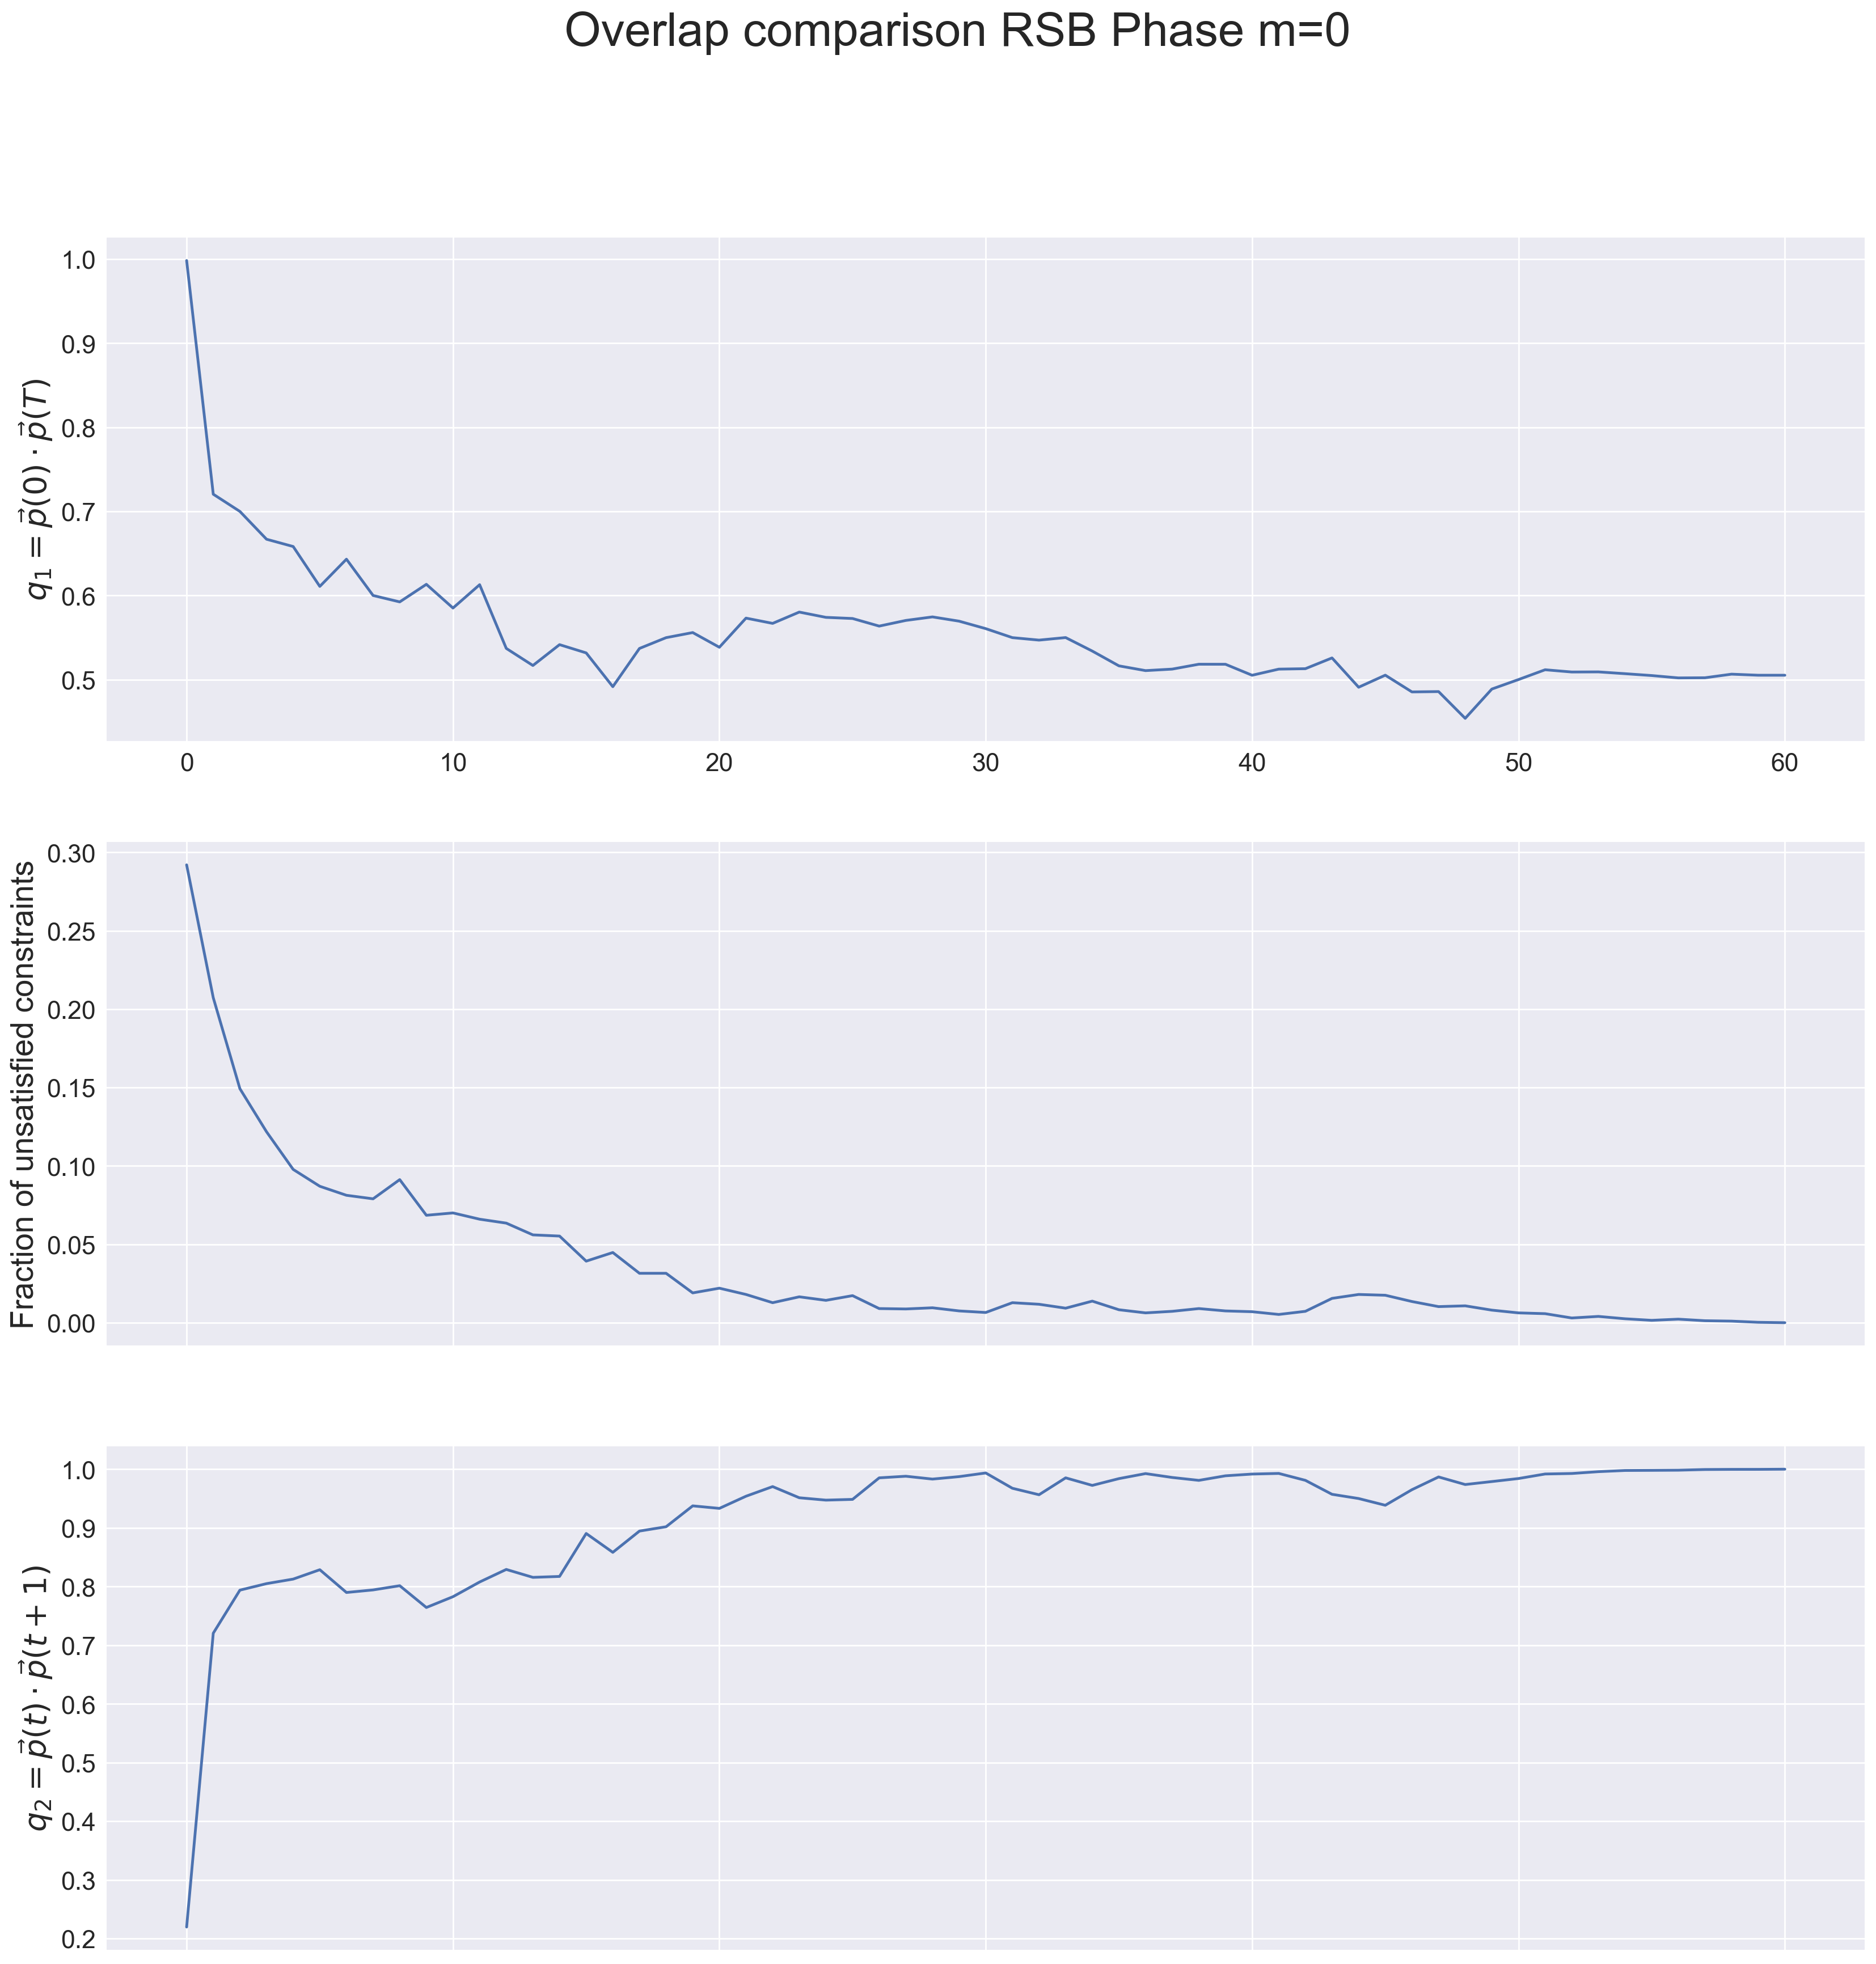

In [54]:
fig = plt.figure(figsize = (20,20), dpi = 200)
ax1 = plt.subplot(311)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.plot(overlaps_1_rsb)
# plt.title('$q_{1} = \\vec{p}(0) \\cdot \\vec{p}(T)$', fontsize = 20)
plt.ylabel('$q_{1} = \\vec{p}(0) \\cdot \\vec{p}(T)$', fontsize = 20)


ax2 = plt.subplot(312,sharex=ax1)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
# plt.title('Energy', fontsize = 20)
plt.plot(rar_rsb[:,2])
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel ('Fraction of unsatisfied constraints', fontsize = 20)



ax3 = plt.subplot(313, sharex = ax1)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('$q_{2} = \\vec{p}(t) \\cdot \\vec{p}(t+1)$', fontsize = 20)
plt.plot(overlaps_2_rsb)
plt.setp(ax3.get_xticklabels(), visible=False)

# plt.subplot(224)
# plt.yticks(fontsize=16)
# plt.xticks(fontsize=16)
# plt.title('Energy', fontsize = 20)
# plt.plot(rar_rs[:,3])
plt.suptitle('Overlap comparison RSB Phase m=0', fontsize = 30)
plt.savefig('plots/compare_w_energy_rsb_bis_m0.pdf')
plt.savefig('plots/compare_w_energy_rsb_bis_m0.png')

(Comment on the almost zero energies: The threshold for when the energies go to zero is around $10^{-10}$

# Comparing the situation with the planted R&R dynamics

What do we want to study

1. The evolution of energies in the RS and RSB phases 
2. The structure of the eigenvalue spectrum 

In [60]:
from evals_utils import *

In [58]:
import os 
os.chdir('/Users/dhruv/Documents/phdcode/cpp_implementation/group_meeting_7_feb/')
print os.getcwd()

/Users/dhruv/Documents/phdcode/cpp_implementation/group_meeting_7_feb


In [221]:
xi = np.loadtxt('planting/m0/xi_data_0.5_20._200_planted0')
xib = xi[:4000]
xia = xi[4000:]

In [222]:
xib_evals_p = compute_evals(normalize_matrix(xib.T))
xib_evals_ag = compute_evals(normalize_matrix(xib))

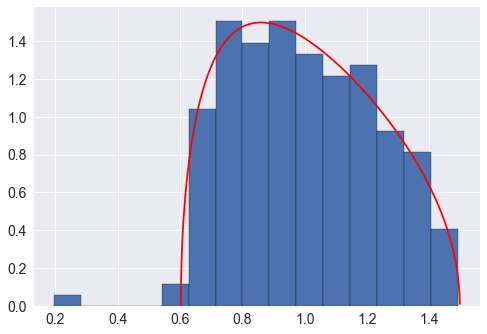

In [223]:
l_p, m_p = mplaw(20.0)
l_ag, m_ag = mplaw(1./20)
plt.plot(l_p, m_p, 'r')
# plt.plot(l_ag, m_ag, 'r')
phist(xia_evals_p[-200:])

In [224]:
xia_evals_p = compute_evals(normalize_matrix(xia.T))
xia_evals_ag = compute_evals(normalize_matrix(xia))

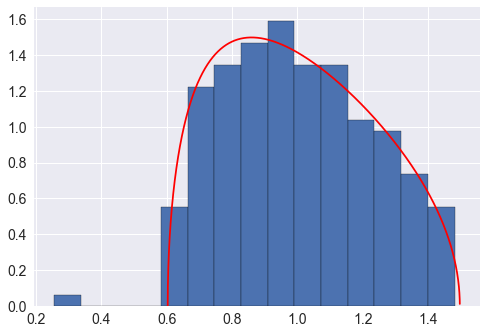

In [225]:
phist(xia_evals_p[:])
plt.plot(l_p, m_p, 'r')
# plt.plot(l_ag, m_ag, 'r')

This is quite interesting. Let us resume all of this, with some plots for comparison. 

In [17]:
xi2 = np.loadtxt('planting/m0/xi_data_0.5_20._200_planted0')
print xi2.shape
xia2 = xi2[4000:]
xib2 = xi2[:4000]

(8000, 200)


In [227]:
xi2_evals_p = compute_evals(normalize_matrix(xia2.T))
xi2_evals_ag = compute_evals(normalize_matrix(xia2))

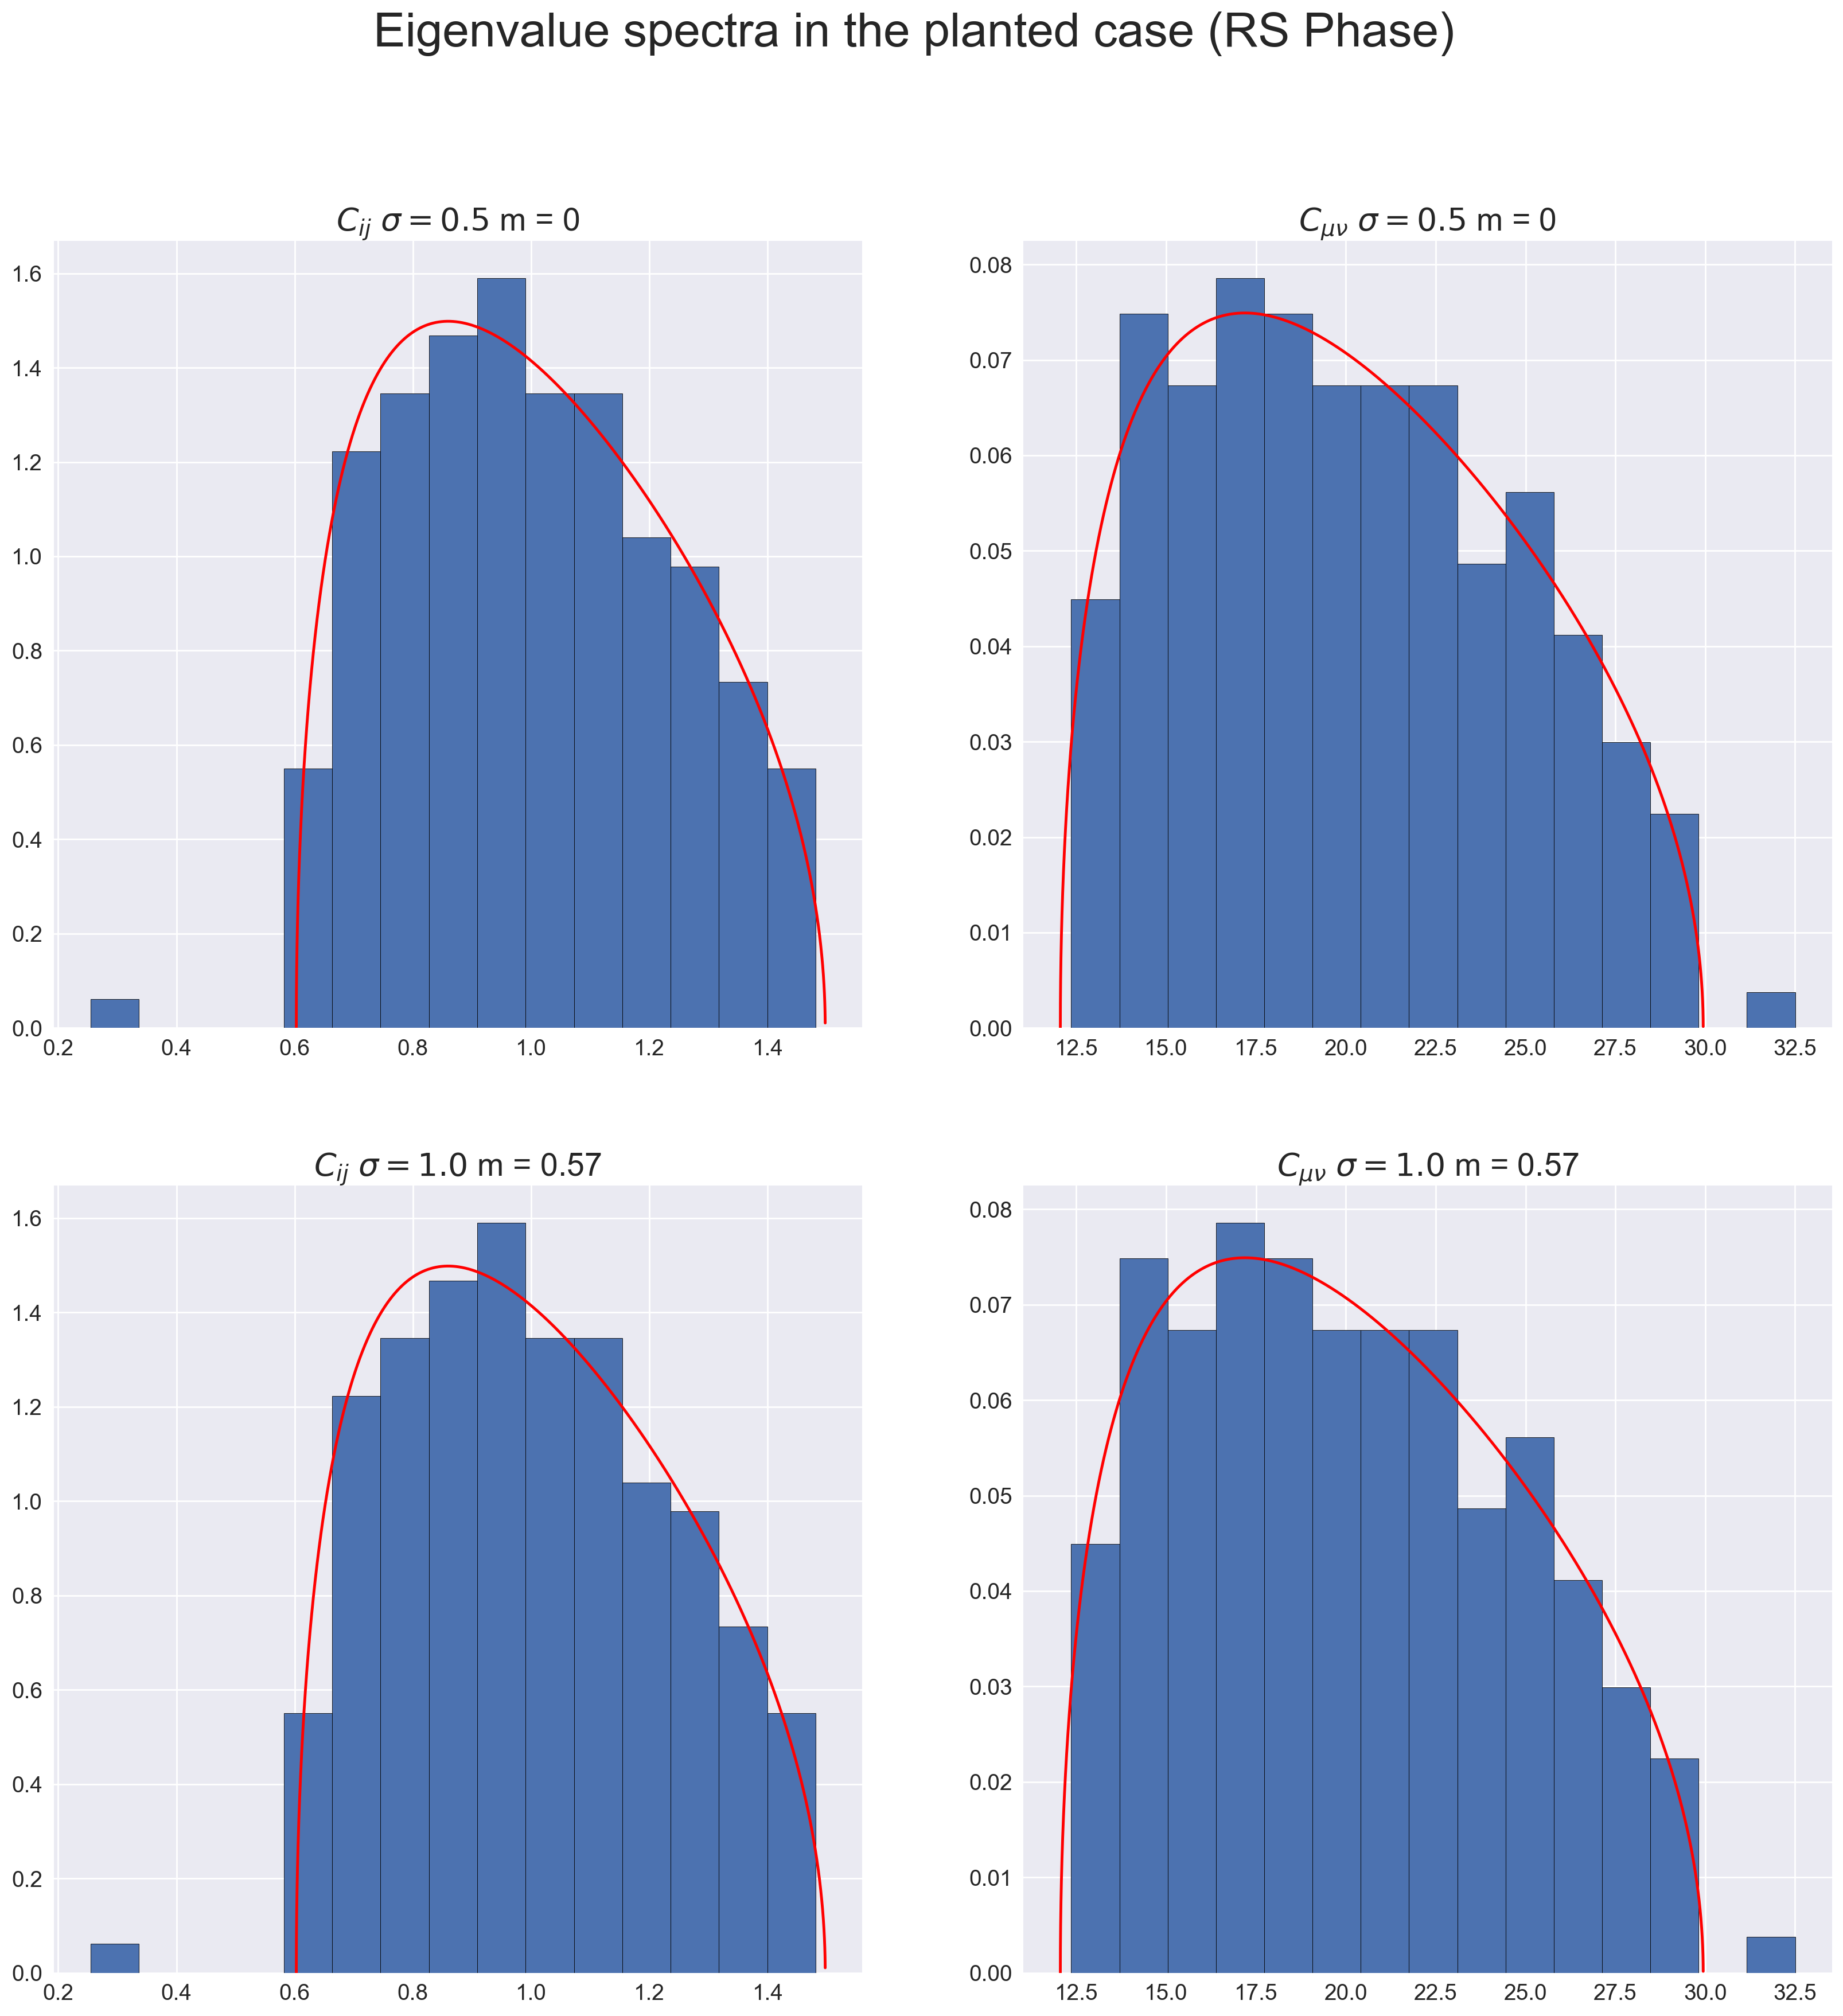

In [297]:
fig = plt.figure(figsize = (20,20), dpi = 200)
plt.subplot(221)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
phist(xia_evals_p)
plt.plot(l_p, m_p, 'r')
plt.title('$C_{ij}$ $\sigma=0.5$ m = 0', fontsize = 20)
plt.subplot(222)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title('$C_{\\mu \\nu}$ $\sigma = 0.5$ m = 0', fontsize = 20)
plt.plot(l_ag, m_ag,'r')
phist(xia_evals_ag[-199:])
plt.subplot(223)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title('$C_{ij}$ $\sigma=1.0$ m = 0.57', fontsize = 20)
plt.plot(l_p, m_p, 'r')
phist(xi2_evals_p)
plt.subplot(224)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title('$C_{\\mu \\nu}$ $\sigma = 1.0$ m = 0.57', fontsize = 20)
plt.plot(l_ag, m_ag,'r')
phist(xi2_evals_ag[-199:])
plt.suptitle("Eigenvalue spectra in the planted case (RS Phase)", fontsize = 30)
plt.savefig('planting/spectra_rs.png')
plt.savefig('planting/spectra_rs.pdf')

We perform a similar analysis for the fRSB phase 

In [1]:
xi1_rsb = np.loadtxt('planting/m0/xi_data_-0.5_20._200_planted0')
xia1_rsb = xi1_rsb[4000:]

NameError: name 'np' is not defined

In [282]:
xi2_rsb = np.loadtxt('planting/m0.57/xi_data_-1._20._200_planted0')
xia2_rsb = xi2_rsb[4000:]

In [283]:
xi1rsb_evals_p = compute_evals(normalize_matrix(xia1_rsb.T))
xi1rsb_evals_ag = compute_evals(normalize_matrix(xia1_rsb))

In [284]:
xi2rsb_evals_p = compute_evals(normalize_matrix(xia2_rsb.T))
xi2rsb_evals_ag = compute_evals(normalize_matrix(xia2_rsb))

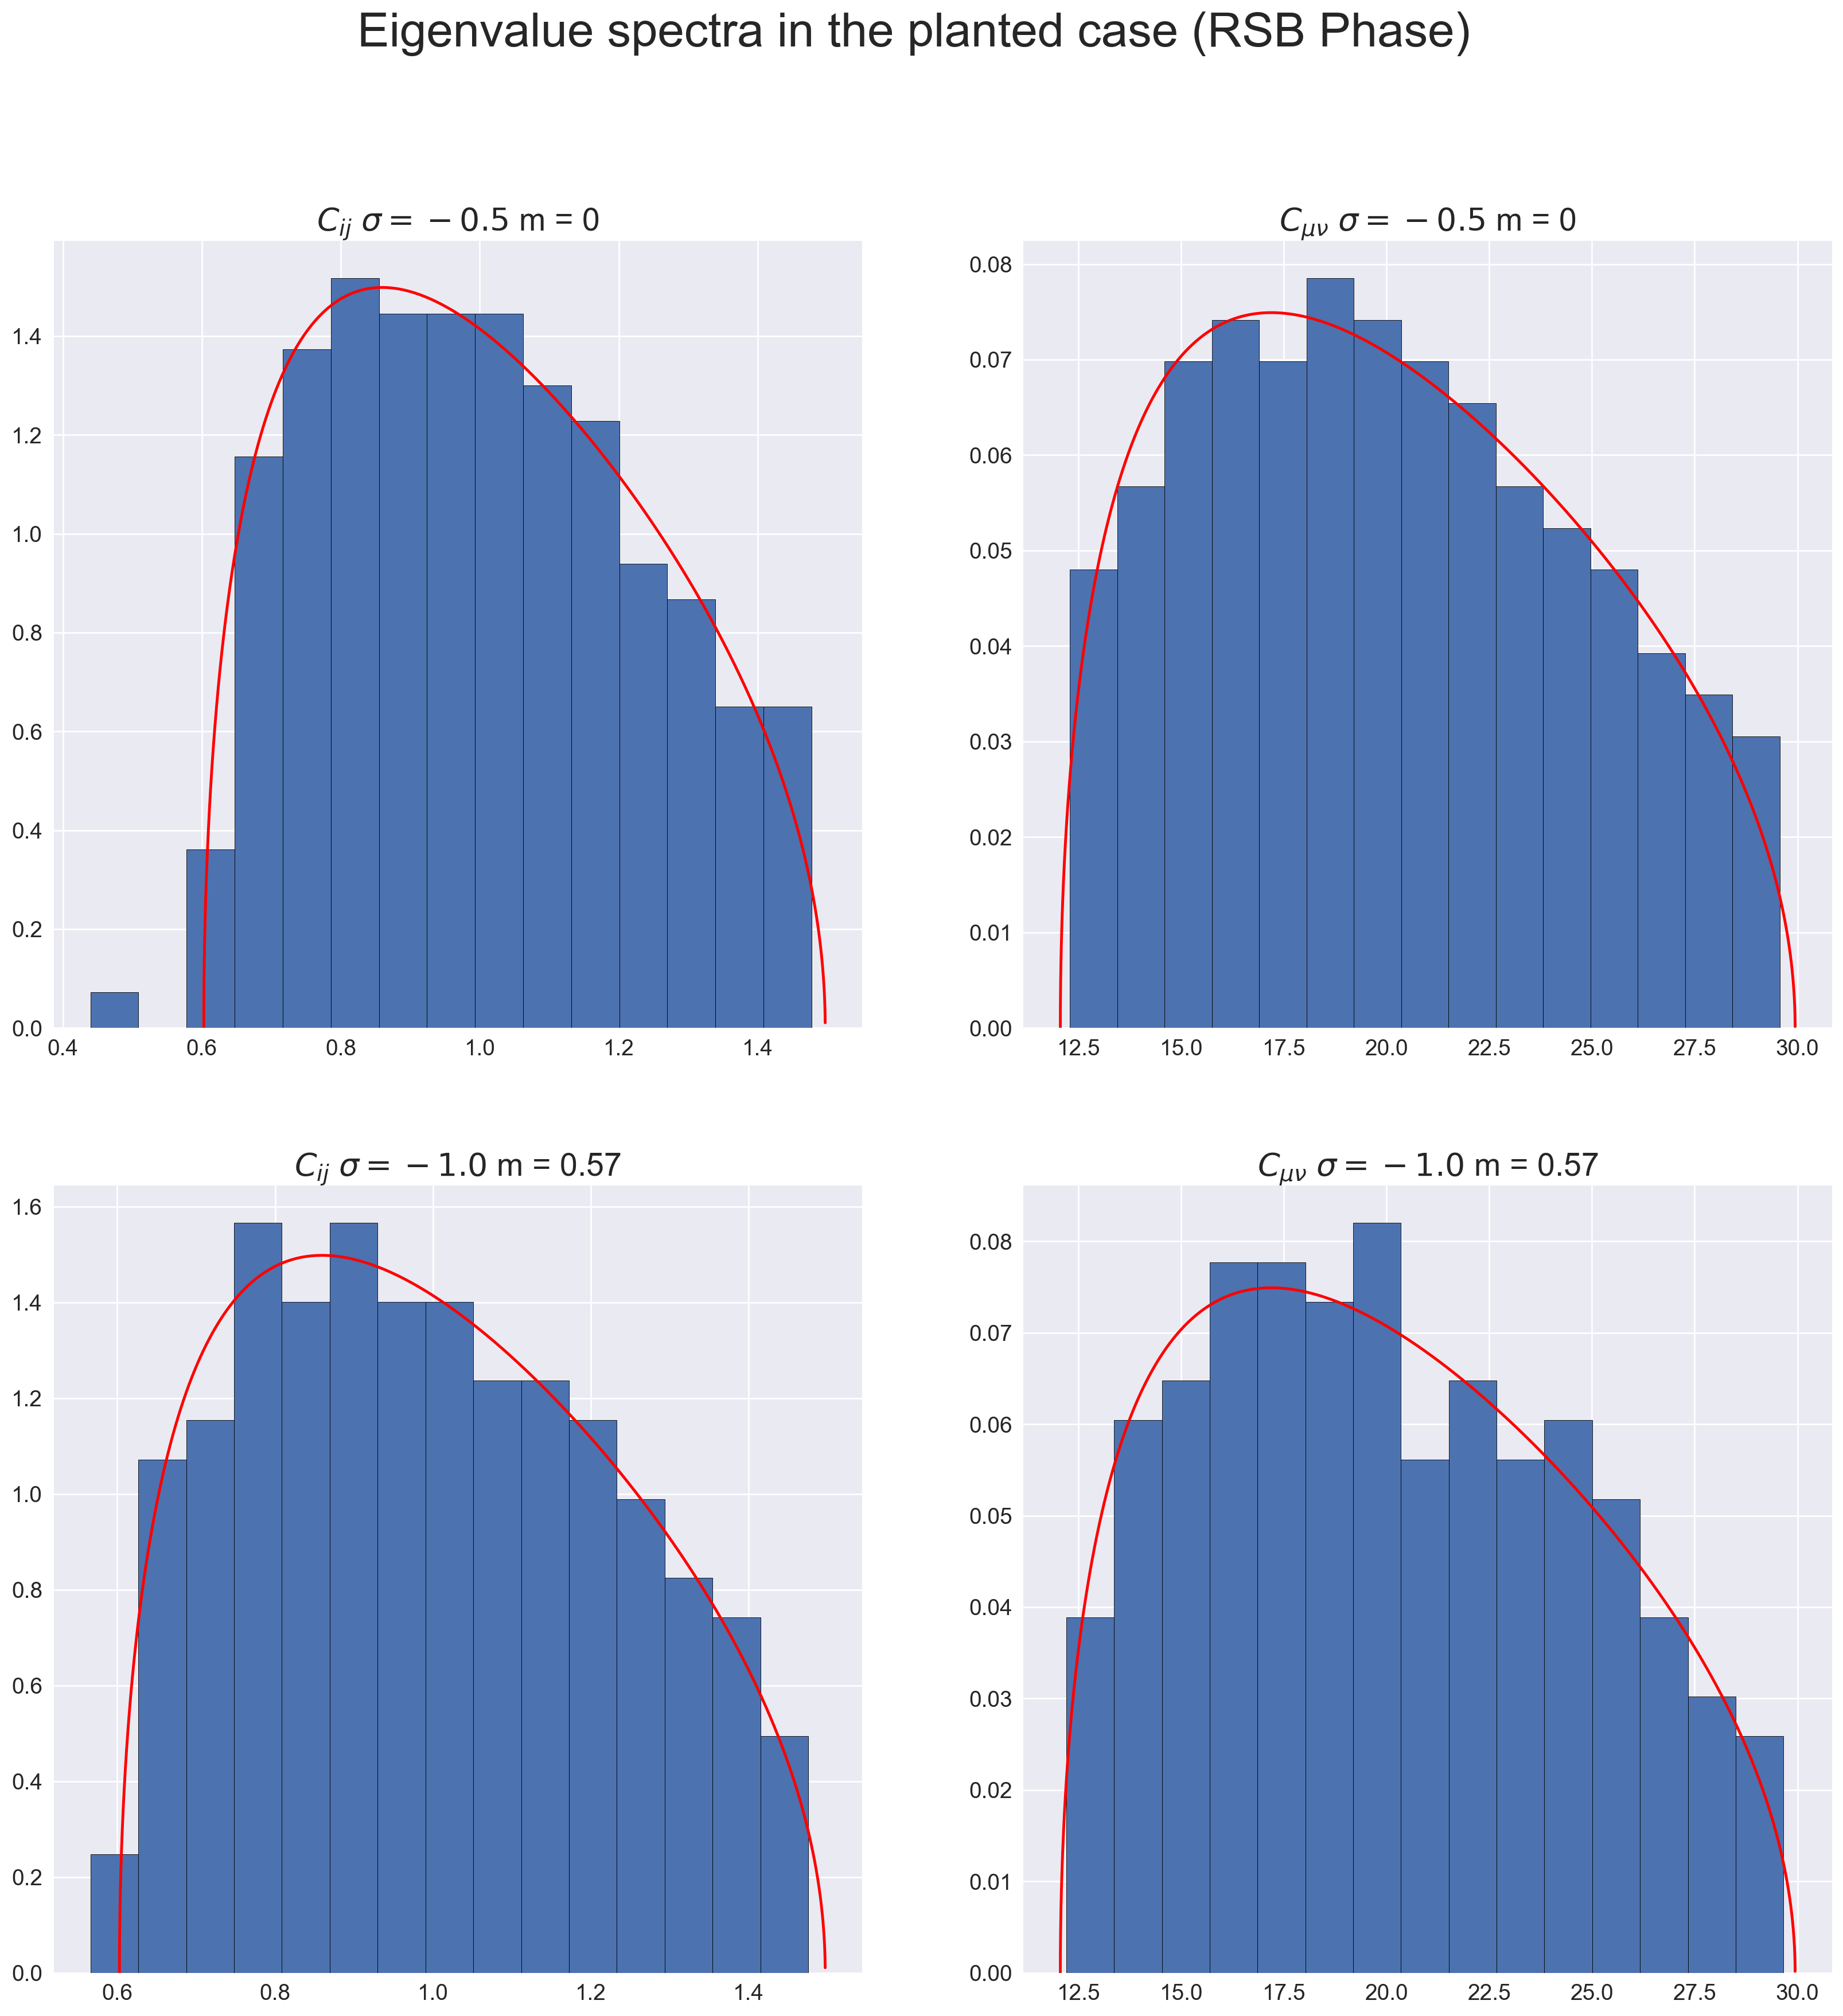

In [296]:
fig = plt.figure(figsize = (20,20), dpi = 200)
plt.subplot(221)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
phist(xi1rsb_evals_p)
plt.plot(l_p, m_p, 'r')
plt.title('$C_{ij}$ $\sigma=-0.5$ m = 0', fontsize = 20)
plt.subplot(222)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title('$C_{\\mu \\nu}$ $\sigma = -0.5$ m = 0', fontsize = 20)
plt.plot(l_ag, m_ag,'r')
phist(xi1rsb_evals_ag[-199:])
plt.subplot(223)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title('$C_{ij}$ $\sigma=-1.0$ m = 0.57', fontsize = 20)
plt.plot(l_p, m_p, 'r')
phist(xi2rsb_evals_p)
plt.subplot(224)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title('$C_{\\mu \\nu}$ $\sigma = -1.0$ m = 0.57', fontsize = 20)
plt.plot(l_ag, m_ag,'r')
phist(xi2rsb_evals_ag[-199:])
plt.suptitle("Eigenvalue spectra in the planted case (RSB Phase)", fontsize = 30)
plt.savefig('planting/spectra_rsb.png')
plt.savefig('planting/spectra_rsb.pdf')

Let us compare the situation with the dynamic R&R

In [291]:
xi_dyn = np.loadtxt('rr_planting_test/m_0/xi_data_-0.5_20._200_gd1')

In [292]:
xia_dyn = xi_dyn[-4000:]

In [293]:
xia_dyn_evals_p = compute_evals(normalize_matrix(xia_dyn.T))
xia_dyn_evals_ag = compute_evals(normalize_matrix(xia_dyn))

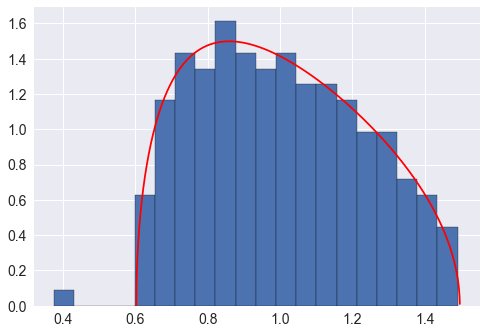

In [294]:
phist(xia_dyn_evals_p, bins = 20)
plt.plot(l_p, m_p, 'r')

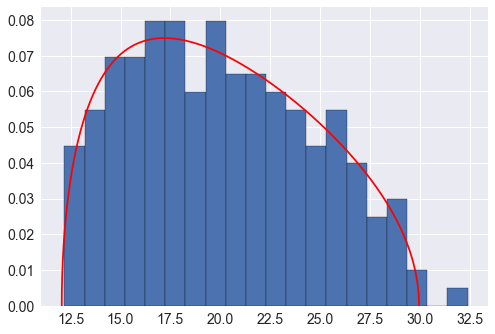

In [295]:
phist(xia_dyn_evals_ag[-199:], bins = 20)
plt.plot(l_ag, m_ag, 'r')

# New overlaps computation

In [234]:
import os 
print os.getcwd()

/Users/dhruv/Documents/phdcode/cpp_implementation/group_meeting_7_feb


In [235]:
xi1_rs = np.loadtxt('rr_planting_test/m_0/xi_data_0.5_20._200_gd1')
xi1_rsb = np.loadtxt('rr_planting_test/m_0/xi_data_-0.5_20._200_gd1')


In [236]:
prices_rs = np.loadtxt('rr_planting_test/m_0/prices_0.5_20._200_gd1')
prices_rsb = np.loadtxt('rr_planting_test/m_0/prices_-0.5_20._200_gd1')

In [237]:
print xi1_rs.shape, xi1_rsb.shape
xi1_rs_a = xi1_rs[-4000:]
xi1_rsb_a = xi1_rsb[-4000:]

(40000, 200) (12000, 200)


In [238]:
prices_fixed.shape

(200,)

In [239]:
from evals_utils import  *

In [242]:
# evals_rs, evecs_rs = compute_evecs(normalize_matrix(xi1_rsb_a.T), div=4000)
evals_rs, evecs_rs = compute_evecs(normalize_matrix(xi1_rsb_a), div=4000)

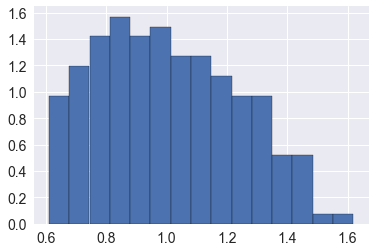

In [245]:
phist(evals_rs[-199:])


In [246]:
outlier = evecs_rs[:,-1]
prices_fixed = prices_rsb[-1]

In [247]:
print outlier.dot(prices_fixed)/200

ValueError: shapes (4000,) and (200,) not aligned: 4000 (dim 0) != 200 (dim 0)

In [222]:
psi = []
for i in range(200):
    temp = evecs_rs[:,i].dot(prices_fixed)/200
    print temp
    psi.append(temp)

-0.06292490215683982
0.0017363638383145307
0.0004277094870969222
-0.004368698729889379
0.009157924909649581
0.002146550519744859
-0.0054966028577334005
0.0020680518238981984
-0.004664403545455359
-0.004365982221569625
-0.0020427855967573225
0.001098612151600915
0.0029777147950452386
0.0006766107209464378
0.002729381075444539
0.0020038970712232015
-0.0003450570809973244
-0.0005514527590565555
0.0003082346247845155
0.0015614710931314182
0.002316129403867692
-0.008756272239679098
0.0020564350176244563
-0.0006936288396435801
1.3608196023984082e-05
-0.0021026170190889095
0.004956278059137811
-0.0005250242371626858
-0.0009616746289165048
-0.0014611163200753993
0.0014960722896487236
-0.0021535475627367075
0.0003294029195909693
-0.0003344083874351387
-0.0006995681077162983
0.0017690463828268065
0.00699748458166705
-0.005539376029846694
-0.001456641845173542
0.000186661251042326
0.0034129165152470635
-0.0003287842924075626
-0.0003272564798565414
0.0011367513058305535
0.0013441634317234036
-0.00

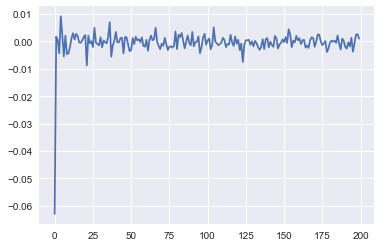

In [223]:
plt.plot(psi)

In [224]:
iprs = []
for i in range(200):
    iprs.append(get_ipr(evecs_rs[:,i]))
iprs = np.asarray(iprs)

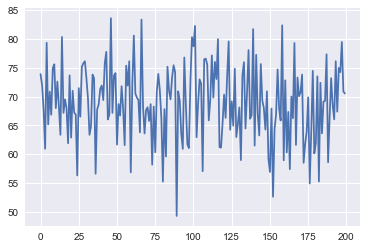

In [225]:
plt.plot(1./iprs)

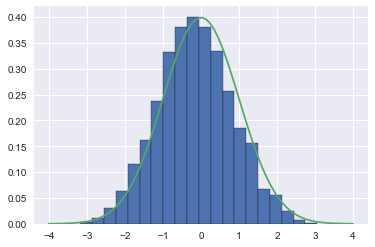

In [288]:
n = 2
x,y = gen_gaussian()
plt.hist(evecs_rs[:,-1*n]*np.sqrt(4000), density = True,ec = "k", bins = 20)
plt.plot(x,y)

# Testing KS Test 

In [314]:
# test = evecs_rs[:,-1*n]*np.sqrt(4000)
test = np.random.normal(size=(100000))
test = np.sort(test)

In [315]:
from scipy.stats import *

In [316]:
kstest(test, 'norm')

KstestResult(statistic=0.0020682280833715927, pvalue=0.785742841445462)

In [317]:
anderson(test)

AndersonResult(statistic=0.3766216976218857, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

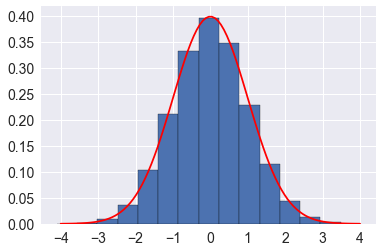

In [318]:
phist(test)
plt.plot(x,y, 'r')